## C2H2

1    -22.0
2    -21.0
3    -20.0
4    -19.0
5    -18.0
6    -17.0
7    -16.0
8    -15.0
9    -14.0
10   -13.0
11   -12.0
12   -11.0
13   -10.0
14    -9.0
15    -8.0
16    -7.0
17    -6.0
18    -5.0
19    -4.0
20    -3.0
21    -2.0
22    -1.0
23     1.0
24     2.0
25     3.0
26     4.0
27     5.0
28     6.0
29     7.0
30     8.0
31     9.0
32    10.0
33    11.0
34    12.0
35    13.0
36    14.0
37    15.0
38    16.0
39    17.0
40    18.0
41    19.0
42    20.0
43    21.0
44    22.0
Name: Unnamed: 43, dtype: float64


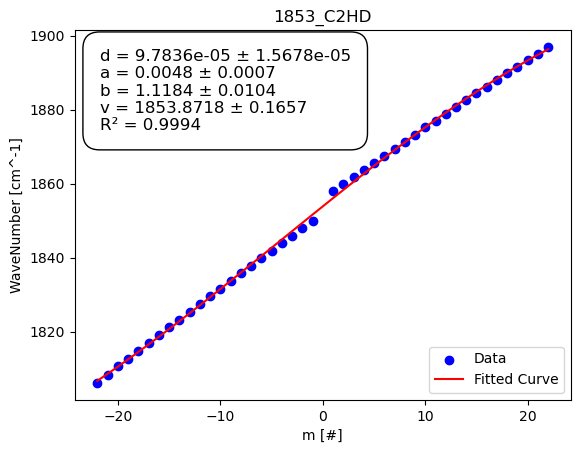

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from Excel
file_path = 'C2H2.C2D2.C2HD.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path, sheet_name='C2HD')


# Extract x (column 1) and y (column 2) from the even-numbered rows
x_data = data.iloc[1:45, 43]  # Column x (zero-indexed)
y_data = data.iloc[1:45, 44]  # Column y (zero-indexed)
print(x_data)
# Define the custom function to fit: -4dx^3 - ax^2 + (2b-2a)x + v
def custom_function(x, d, a, b, v):
    fitting = -4 * d * x**3 - a * x**2 + (2*b-2*a) * x + v
    return fitting

# Fit the data using curve_fit
params, covariance = curve_fit(custom_function, x_data, y_data)

# Extract the fitted parameters
d_fit, a_fit, b_fit, v_fit = params
    
param_errors = np.sqrt(np.diag(covariance))
d_error, a_error, b_error, v_error = param_errors
# Calculate the fitted values
y_fit = custom_function(x_data, *params)

# Calculate R-squared (R^2)
residuals = y_data - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, y_fit, color='red', label='Fitted Curve')

# Annotate the plot with the fitted parameters and R-squared
plt.text(0.05, 0.95, f'd = {d_fit:.4e} ± {d_error:.4e}\n'
                     f'a = {a_fit:.4f} ± {a_error:.4f}\n'
                     f'b = {b_fit:.4f} ± {b_error:.4f}\n'
                     f'v = {v_fit:.4f} ± {v_error:.4f}\n'
                     f'R² = {r_squared:.4f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.legend()
plt.xlabel('m [#]')
plt.ylabel('WaveNumber [cm^-1]')
plt.title('1853_C2HD')
plt.show()

